In [39]:
from preparing_script import agrofiz_plot, SVD_vis, Kvu, ob_ves_plot, eroz_vis
import pandas as pd 
import numpy as np 
import scipy 
from scipy.stats import f_oneway as ANOVA

import seaborn as sns 
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
agrofiz = pd.read_csv('data/Агрофизика все объекты.csv')
agrofiz.head(10)

,region,Год,Тип обработки,GPS №,"СВД, мм","СВД агроном. цен., мм","Эрозионно опасные (<1 мм), %",повторность,"СВД водоустойчивые 10-7, мм","СВД водоустойчивые 5-3, мм","СВД водоустойчивые 7-5, мм","СВД водоустойчивые >10, мм","Эрозионно опасные 10-7 (<1 мм), %","Эрозионно опасные 5-3 (<1 мм), %","Эрозионно опасные 7-5 (<1 мм), %","Эрозионно опасные >10 (<1 мм), %"
0,Курск,2019,ПП,__,9.106996,1.460856,2.861062,1,1.349375,0.854937,1.147437,0.950000,75.30,80.75,70.55,76.60
1,Курск,2019,ПП,__,8.386025,1.532257,6.685393,2,2.030312,0.872875,1.215250,2.726813,61.45,78.90,69.60,60.85
2,Курск,2019,ПП,__,8.300786,1.915038,2.691599,3,3.213000,1.106500,1.519563,2.745750,16.60,69.20,62.25,49.00
3,Курск,2019,ПП,__,9.825944,1.119489,2.838208,4,2.202875,0.886250,1.341687,6.431375,59.70,81.80,67.15,41.10
4,Курск,2019,ПП,__,8.849472,1.716434,1.738650,5,1.791562,0.800313,1.141625,3.687813,63.65,80.65,72.10,50.45
5,Курск,2019,ТТ,__,9.826951,1.061199,3.869919,1,2.411312,1.029688,1.635375,4.972812,51.45,74.75,58.10,48.05
6,Курск,2019,ТТ,__,6.609721,2.027766,5.425074,2,1.606812,1.162875,1.255813,2.429000,65.65,65.90,70.05,70.40
7,Курск,2019,ТТ,__,10.358241,0.866819,2.561705,3,3.214500,0.905375,1.502250,8.581500,49.80,76.10,64.20,19.60
8,Курск,2019,ТТ,__,8.622014,1.540706,2.405383,4,2.759813,1.192813,1.766063,4.915313,55.05,71.45,56.25,36.45
9,Курск,2019,ТТ,__,7.898253,1.710809,2.438143,5,3.397750,1.076938,1.722437,5.246750,51.60,66.75,59.35,49.80


## Урожайное 2022 год точки XX/XVIII

In [41]:
agrofiz_urozaynoe_2022 = agrofiz[
    (agrofiz["region"] == 'урожайное') & 
    (agrofiz["Год"] == 2022) &
    agrofiz['GPS №'].isin(['XX', 'XVIII'])
    ]
agrofiz_urozaynoe_2022

,region,Год,Тип обработки,GPS №,"СВД, мм","СВД агроном. цен., мм","Эрозионно опасные (<1 мм), %",повторность,"СВД водоустойчивые 10-7, мм","СВД водоустойчивые 5-3, мм","СВД водоустойчивые 7-5, мм","СВД водоустойчивые >10, мм","Эрозионно опасные 10-7 (<1 мм), %","Эрозионно опасные 5-3 (<1 мм), %","Эрозионно опасные 7-5 (<1 мм), %","Эрозионно опасные >10 (<1 мм), %"
40,урожайное,2022,ПП,XX,8.639647,1.918459,4.301766,1,3.373725,1.790350,2.511706,6.672106,26.640,38.080,29.365,15.185
41,урожайное,2022,ПП,XX,9.590275,1.631729,2.968542,2,3.089969,1.628569,2.434737,4.744525,32.075,41.015,32.030,26.300
42,урожайное,2022,ПП,XX,9.108922,1.868650,3.516770,3,4.032112,2.481025,2.977863,5.222562,21.210,21.300,23.130,19.790
43,урожайное,2022,ПП,XX,7.979785,2.110247,4.210526,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,урожайное,2022,ПП,XX,10.535416,1.034932,2.951851,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,урожайное,2022,ТТ,XVIII,9.728647,1.706031,3.473319,1,3.237744,1.251144,2.298556,3.725125,29.035,56.855,40.905,33.460
51,урожайное,2022,ТТ,XVIII,7.294100,2.444161,6.788604,2,3.184438,1.428750,2.119569,4.073956,29.070,45.400,38.795,29.005
52,урожайное,2022,ТТ,XVIII,9.050251,1.312462,6.086427,3,2.239563,1.133413,1.808537,2.650925,46.470,59.250,46.130,35.120
53,урожайное,2022,ТТ,XVIII,10.154072,0.849149,8.626639,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,урожайное,2022,ТТ,XVIII,11.408210,0.718787,2.130178,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### СВД

F_onewayResult(statistic=0.1963277921034889, pvalue=0.6694385252159205)


СВД, мм                    
                    sem      mean       std
Тип обработки                              
ПП             0.432586  9.170809  0.967291
ТТ             0.677715  9.527056  1.515418

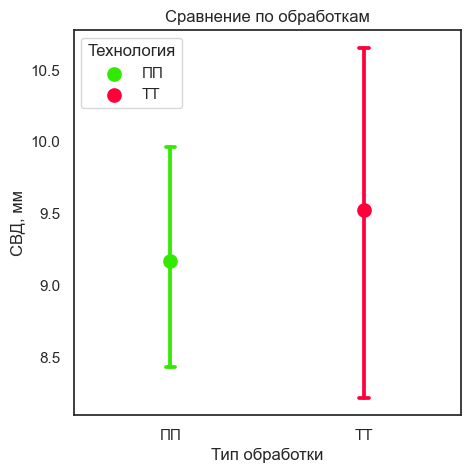

In [42]:
stats, aov, fig = agrofiz_plot(agrofiz_urozaynoe_2022, 'СВД, мм')
print(aov)
stats

### СВД агроном. цен., мм

F_onewayResult(statistic=0.7099863002014082, pvalue=0.423921868645741)


СВД агроном. цен., мм                    
                                sem      mean       std
Тип обработки                                          
ПП                         0.185826  1.712804  0.415520
ТТ                         0.312961  1.406118  0.699802

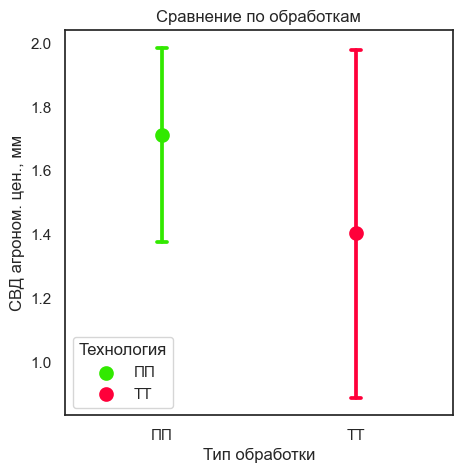

In [43]:
stats, aov, fig = agrofiz_plot(agrofiz_urozaynoe_2022, 'СВД агроном. цен., мм')
print(aov)
stats

### Эрозионно опасные (<1 мм), %

F_onewayResult(statistic=2.3202550396555517, pvalue=0.16620089358039822)


Эрозионно опасные (<1 мм), %                    
                                       sem      mean       std
Тип обработки                                                 
ПП                                0.290729  3.589891  0.650090
ТТ                                1.166453  5.421033  2.608267

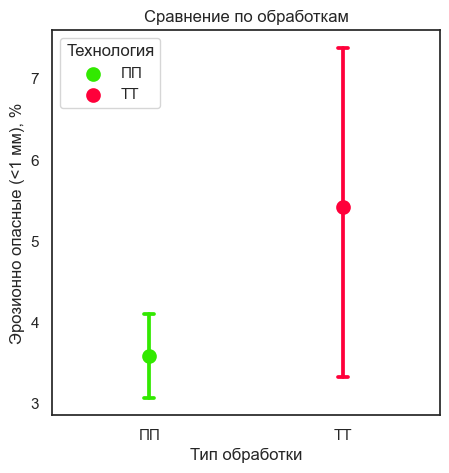

In [44]:
stats, aov, fig = agrofiz_plot(agrofiz_urozaynoe_2022, 'Эрозионно опасные (<1 мм), %')
print(aov)
stats

## СВД водопрочных агрегатов

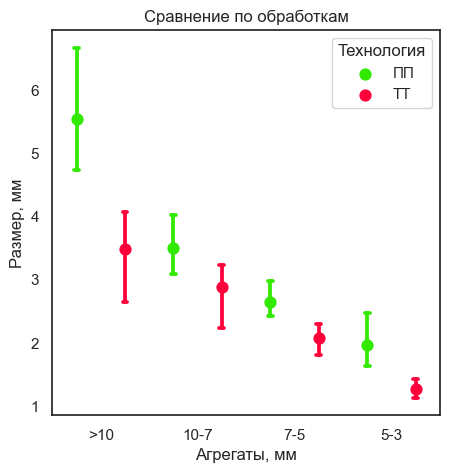

                      агрегаты     P-val
0   СВД водоустойчивые >10, мм  0.045785
1  СВД водоустойчивые 10-7, мм  0.226157
2   СВД водоустойчивые 7-5, мм  0.063371
3   СВД водоустойчивые 5-3, мм  0.064797


СВД водоустойчивые >10, мм                      \
                                     sem      mean       std   
Тип обработки                                                  
ПП                              0.579524  5.546398  1.003765   
ТТ                              0.428214  3.483335  0.741688   

              СВД водоустойчивые 10-7, мм                      \
                                      sem      mean       std   
Тип обработки                                                   
ПП                               0.279049  3.498602  0.483326   
ТТ                               0.324208  2.887248  0.561545   

              СВД водоустойчивые 7-5, мм                      \
                                     sem      mean       std   
Тип обработки                                                  
ПП                              0.169675  2.641435  0.293885   
ТТ                              0.143158  2.075554  0.247957   

              СВД водоустойчивые 5-3, мм                      
                                     sem      mean       std  
Тип обработки                                                 
ПП                              0.261394  1.966648  0.452748  
ТТ                              0.085839  1.271102  0.148677

In [45]:
stats, aov, fig = SVD_vis(agrofiz_urozaynoe_2022)
print(aov)
stats

### Содержание эрозионно опасных агрегатов (<1 мм)

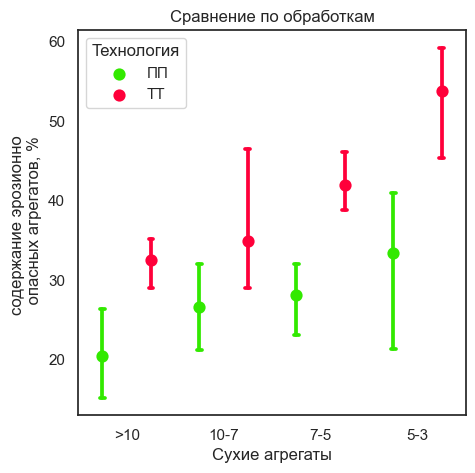

                            агрегаты     P-val
0   Эрозионно опасные >10 (<1 мм), %  0.030891
1  Эрозионно опасные 10-7 (<1 мм), %  0.281035
2   Эрозионно опасные 7-5 (<1 мм), %  0.015814
3   Эрозионно опасные 5-3 (<1 мм), %  0.052848


Эрозионно опасные >10 (<1 мм), %                       \
                                           sem       mean       std   
Тип обработки                                                         
ПП                                    3.224294  20.425000  5.584642   
ТТ                                    1.825679  32.528333  3.162168   

              Эрозионно опасные 10-7 (<1 мм), %                        \
                                            sem       mean        std   
Тип обработки                                                           
ПП                                     3.136455  26.641667   5.432500   
ТТ                                     5.805842  34.858333  10.056014   

              Эрозионно опасные 7-5 (<1 мм), %                       \
                                           sem       mean       std   
Тип обработки                                                         
ПП                                    2.637207  28.175000  4.567776   
ТТ                                    2.180150  41.943333  3.776130   

              Эрозионно опасные 5-3 (<1 мм), %                     
                                           sem    mean        std  
Тип обработки                                                      
ПП                                    6.141226  33.465  10.636916  
ТТ                                    4.273793  53.835   7.402427

In [46]:
stats, aov, fig = eroz_vis(agrofiz_urozaynoe_2022)
print(aov)
stats

## Урожайное 2017 год точки XX/XVIII

In [47]:
agrofiz_urozaynoe_2017 = agrofiz[
    (agrofiz["region"] == 'урожайное') & 
    (agrofiz["Год"] == 2017) &
    agrofiz['GPS №'].isin(['XX', 'XVIII'])
    ]

agrofiz_urozaynoe_2017

,region,Год,Тип обработки,GPS №,"СВД, мм","СВД агроном. цен., мм","Эрозионно опасные (<1 мм), %",повторность,"СВД водоустойчивые 10-7, мм","СВД водоустойчивые 5-3, мм","СВД водоустойчивые 7-5, мм","СВД водоустойчивые >10, мм","Эрозионно опасные 10-7 (<1 мм), %","Эрозионно опасные 5-3 (<1 мм), %","Эрозионно опасные 7-5 (<1 мм), %","Эрозионно опасные >10 (<1 мм), %"
20,урожайное,2017,ПП,XX,8.748902,1.772273,6.121212,1,2.074631,0.954650,1.346756,2.906325,54.865,70.020,58.645,51.88
21,урожайное,2017,ПП,XX,10.750677,1.066469,2.919049,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,урожайное,2017,ПП,XX,10.264115,1.351475,4.101124,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,урожайное,2017,ПП,XX,9.728741,2.015178,2.943581,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,урожайное,2017,ПП,XX,11.493615,0.709160,2.321655,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,урожайное,2017,ТТ,XVIII,9.759188,1.128956,5.359877,1,2.022062,0.953981,1.317087,3.931800,59.630,65.965,64.790,51.22
26,урожайное,2017,ТТ,XVIII,8.293232,2.170462,5.987261,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,урожайное,2017,ТТ,XVIII,7.678084,2.951565,5.703658,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,урожайное,2017,ТТ,XVIII,9.379651,1.783679,4.569006,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,урожайное,2017,ТТ,XVIII,9.632530,1.645859,4.029304,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### СВД

F_onewayResult(statistic=4.069453645772339, pvalue=0.07838746199793958)


СВД, мм                     
                    sem       mean       std
Тип обработки                               
ПП             0.464141  10.197210  1.037850
ТТ             0.409532   8.948537  0.915742

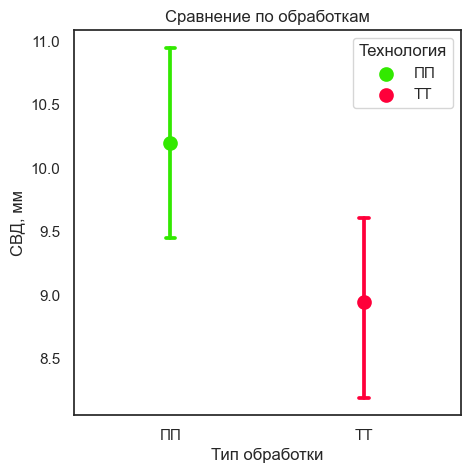

In [48]:
stats, aov, fig = agrofiz_plot(agrofiz_urozaynoe_2017, 'СВД, мм')
print(aov)
stats


### СВД агроном. цен., мм

F_onewayResult(statistic=2.0736932898655107, pvalue=0.18781933945551493)


СВД агроном. цен., мм                    
                                sem      mean       std
Тип обработки                                          
ПП                         0.235205  1.382911  0.525935
ТТ                         0.303731  1.936104  0.679163

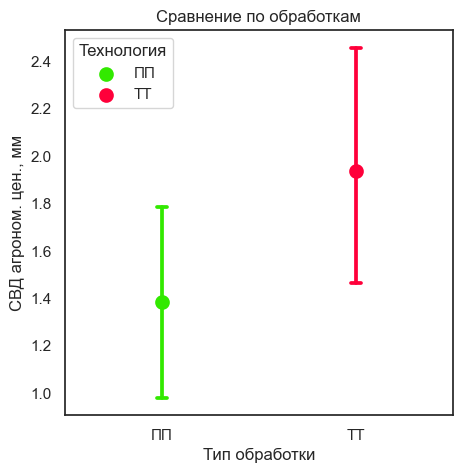

In [49]:
stats, aov, fig = agrofiz_plot(agrofiz_urozaynoe_2017, 'СВД агроном. цен., мм')
print(aov)
stats

### Эрозионно опасные (<1 мм), %

F_onewayResult(statistic=3.57240866345803, pvalue=0.09541392259209239)


Эрозионно опасные (<1 мм), %                    
                                       sem      mean       std
Тип обработки                                                 
ПП                                0.674660  3.681324  1.508585
ТТ                                0.363529  5.129821  0.812876

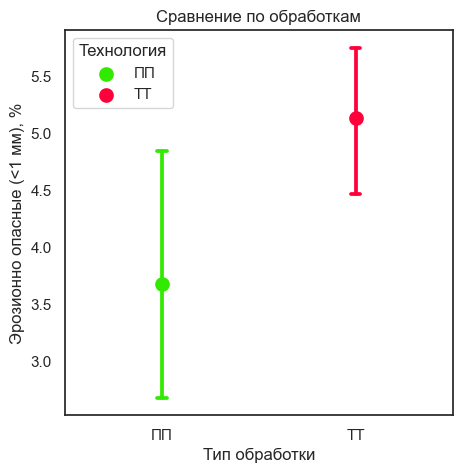

In [50]:
stats, aov, fig = agrofiz_plot(agrofiz_urozaynoe_2017, 'Эрозионно опасные (<1 мм), %')
print(aov)
stats

## Курск

In [51]:
kursk_urozaynoe_2022 = agrofiz[
    (agrofiz["region"] == 'Курск') 
    ]
kursk_urozaynoe_2022

,region,Год,Тип обработки,GPS №,"СВД, мм","СВД агроном. цен., мм","Эрозионно опасные (<1 мм), %",повторность,"СВД водоустойчивые 10-7, мм","СВД водоустойчивые 5-3, мм","СВД водоустойчивые 7-5, мм","СВД водоустойчивые >10, мм","Эрозионно опасные 10-7 (<1 мм), %","Эрозионно опасные 5-3 (<1 мм), %","Эрозионно опасные 7-5 (<1 мм), %","Эрозионно опасные >10 (<1 мм), %"
0,Курск,2019,ПП,__,9.106996,1.460856,2.861062,1,1.349375,0.854937,1.147437,0.950000,75.30,80.75,70.55,76.60
1,Курск,2019,ПП,__,8.386025,1.532257,6.685393,2,2.030312,0.872875,1.215250,2.726813,61.45,78.90,69.60,60.85
2,Курск,2019,ПП,__,8.300786,1.915038,2.691599,3,3.213000,1.106500,1.519563,2.745750,16.60,69.20,62.25,49.00
3,Курск,2019,ПП,__,9.825944,1.119489,2.838208,4,2.202875,0.886250,1.341687,6.431375,59.70,81.80,67.15,41.10
4,Курск,2019,ПП,__,8.849472,1.716434,1.738650,5,1.791562,0.800313,1.141625,3.687813,63.65,80.65,72.10,50.45
5,Курск,2019,ТТ,__,9.826951,1.061199,3.869919,1,2.411312,1.029688,1.635375,4.972812,51.45,74.75,58.10,48.05
6,Курск,2019,ТТ,__,6.609721,2.027766,5.425074,2,1.606812,1.162875,1.255813,2.429000,65.65,65.90,70.05,70.40
7,Курск,2019,ТТ,__,10.358241,0.866819,2.561705,3,3.214500,0.905375,1.502250,8.581500,49.80,76.10,64.20,19.60
8,Курск,2019,ТТ,__,8.622014,1.540706,2.405383,4,2.759813,1.192813,1.766063,4.915313,55.05,71.45,56.25,36.45
9,Курск,2019,ТТ,__,7.898253,1.710809,2.438143,5,3.397750,1.076938,1.722437,5.246750,51.60,66.75,59.35,49.80


### СВД

F_onewayResult(statistic=0.10092454302937544, pvalue=0.7588565913465707)


СВД, мм                    
                    sem      mean       std
Тип обработки                              
ПП             0.276207  8.893845  0.617618
ТТ             0.671978  8.663036  1.502589

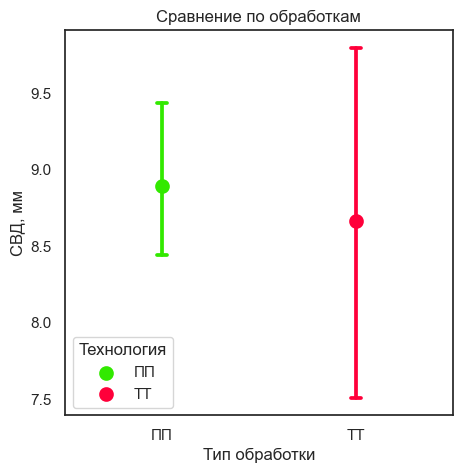

In [52]:
stats, aov, fig = agrofiz_plot(kursk_urozaynoe_2022, 'СВД, мм')
print(aov)
stats

### СВД агроном. цен., мм

F_onewayResult(statistic=0.18359125454838887, pvalue=0.6796080714176631)


СВД агроном. цен., мм                    
                                sem      mean       std
Тип обработки                                          
ПП                         0.133144  1.548815  0.297719
ТТ                         0.212246  1.441460  0.474596

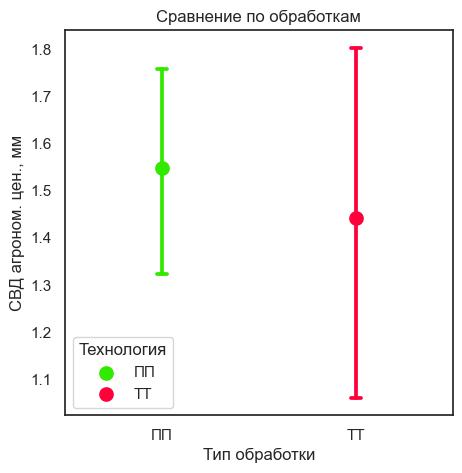

In [53]:
stats, aov, fig = agrofiz_plot(kursk_urozaynoe_2022, 'СВД агроном. цен., мм')
print(aov)
stats

### Эрозионно опасные (<1 мм), %

F_onewayResult(statistic=0.0004877091913004415, pvalue=0.9829217319271457)


Эрозионно опасные (<1 мм), %                    
                                       sem      mean       std
Тип обработки                                                 
ПП                                0.856006  3.362983  1.914088
ТТ                                0.588258  3.340045  1.315385

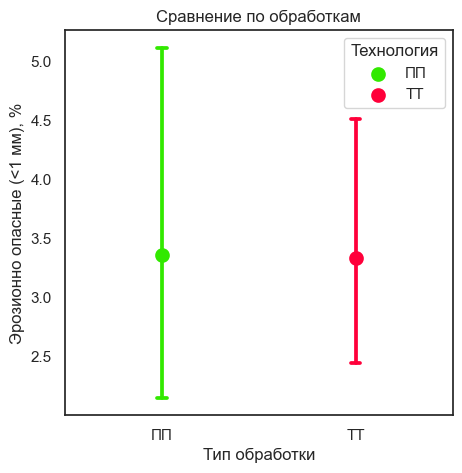

In [54]:
stats, aov, fig = agrofiz_plot(kursk_urozaynoe_2022, 'Эрозионно опасные (<1 мм), %')
print(aov)
stats

### СВД водопрочных агрегатов

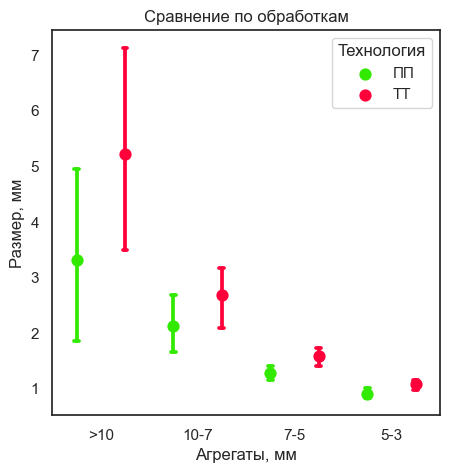

                      агрегаты     P-val
0   СВД водоустойчивые >10, мм  0.186578
1  СВД водоустойчивые 10-7, мм  0.242260
2   СВД водоустойчивые 7-5, мм  0.031338
3   СВД водоустойчивые 5-3, мм  0.049990


СВД водоустойчивые >10, мм                      \
                                     sem      mean       std   
Тип обработки                                                  
ПП                              0.897602  3.308350  2.007100   
ТТ                              0.980908  5.229075  2.193377   

              СВД водоустойчивые 10-7, мм                      \
                                      sem      mean       std   
Тип обработки                                                   
ПП                               0.309133  2.117425  0.691242   
ТТ                               0.318679  2.678037  0.712589   

              СВД водоустойчивые 7-5, мм                      \
                                     sem      mean       std   
Тип обработки                                                  
ПП                              0.071369  1.273112  0.159586   
ТТ                              0.091938  1.576388  0.205579   

              СВД водоустойчивые 5-3, мм                      
                                     sem      mean       std  
Тип обработки                                                 
ПП                              0.052654  0.904175  0.117737  
ТТ                              0.051196  1.073538  0.114478

In [55]:
stats, aov, fig = SVD_vis(kursk_urozaynoe_2022)
print(aov)
stats

### Содержание эрозионно опасных агрегатов (<1 мм)


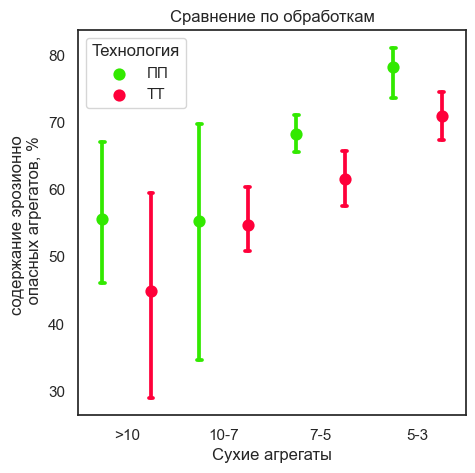

                            агрегаты     P-val
0   Эрозионно опасные >10 (<1 мм), %  0.329987
1  Эрозионно опасные 10-7 (<1 мм), %  0.953456
2   Эрозионно опасные 7-5 (<1 мм), %  0.056570
3   Эрозионно опасные 5-3 (<1 мм), %  0.046625


Эрозионно опасные >10 (<1 мм), %                    \
                                           sem   mean        std   
Тип обработки                                                      
ПП                                    6.119212  55.60  13.682973   
ТТ                                    8.353643  44.86  18.679313   

              Эрозионно опасные 10-7 (<1 мм), %                    \
                                            sem   mean        std   
Тип обработки                                                       
ПП                                    10.061280  55.34  22.497705   
ТТ                                     2.865371  54.71   6.407164   

              Эрозионно опасные 7-5 (<1 мм), %                   \
                                           sem   mean       std   
Тип обработки                                                     
ПП                                    1.719200  68.33  3.844249   
ТТ                                    2.490954  61.59  5.569942   

              Эрозионно опасные 5-3 (<1 мм), %                   
                                           sem   mean       std  
Тип обработки                                                    
ПП                                    2.312326  78.26  5.170517  
ТТ                                    2.053619  70.99  4.592031

In [56]:
stats, aov, fig = eroz_vis(kursk_urozaynoe_2022)
print(aov)
stats

## Архангельский

In [57]:
archan = agrofiz[
    (agrofiz["region"] == 'архангельский') 
    ]
archan

,region,Год,Тип обработки,GPS №,"СВД, мм","СВД агроном. цен., мм","Эрозионно опасные (<1 мм), %",повторность,"СВД водоустойчивые 10-7, мм","СВД водоустойчивые 5-3, мм","СВД водоустойчивые 7-5, мм","СВД водоустойчивые >10, мм","Эрозионно опасные 10-7 (<1 мм), %","Эрозионно опасные 5-3 (<1 мм), %","Эрозионно опасные 7-5 (<1 мм), %","Эрозионно опасные >10 (<1 мм), %"
10,архангельский,2019,ПП,Архангельский,8.945267,1.566805,8.509680,1,3.309188,1.482250,2.042812,5.824938,42.75,54.00,45.25,29.95
11,архангельский,2019,ПП,Архангельский,9.006803,1.800680,5.578231,2,4.639188,1.652625,1.927875,4.220562,28.55,46.50,48.70,34.45
12,архангельский,2019,ПП,Архангельский,8.759355,1.767794,7.592191,3,2.709750,1.197062,2.330312,6.496625,50.20,57.25,43.85,29.10
13,архангельский,2019,ПП,Архангельский,9.851676,1.498962,5.784634,4,3.168250,1.355687,1.871875,4.479063,36.80,55.35,50.70,39.45
14,архангельский,2019,ПП,Архангельский,8.993835,1.628103,7.745780,5,2.935500,1.428563,2.346250,3.505313,43.60,53.45,39.80,36.85
15,архангельский,2019,ТТ,Архангельский,10.122749,0.769932,10.599592,1,1.670250,0.990312,1.292250,1.901562,70.20,69.25,61.60,61.05
16,архангельский,2019,ТТ,Архангельский,3.042302,3.029386,33.148405,2,1.598188,0.869312,1.158875,1.495250,53.35,74.25,69.70,58.40
17,архангельский,2019,ТТ,Архангельский,6.406779,1.697023,19.942611,3,2.025687,0.942062,1.339938,2.872438,53.55,61.65,56.95,44.95
18,архангельский,2019,ТТ,Архангельский,7.948730,1.531136,14.114912,4,1.509125,0.825187,1.290063,2.794875,71.50,77.55,60.05,50.90
19,архангельский,2019,ТТ,Архангельский,8.863967,1.303585,13.783510,5,1.318438,0.903250,1.474813,3.242062,72.75,70.20,57.05,51.45


### СВД

F_onewayResult(statistic=2.208055516148786, pvalue=0.17559796290943253)


СВД, мм                    
                    sem      mean       std
Тип обработки                              
ПП             0.190303  9.111387  0.425531
ТТ             1.219793  7.276905  2.727541

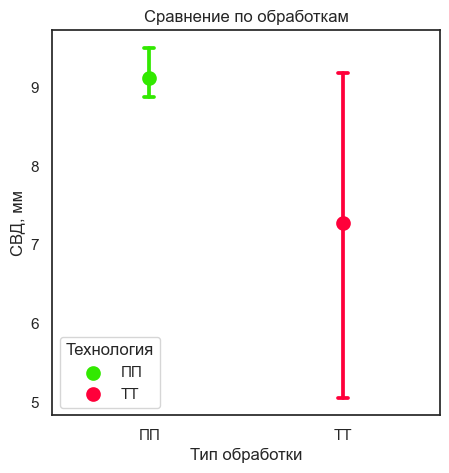

In [58]:
stats, aov, fig = agrofiz_plot(archan, 'СВД, мм')
print(aov)
stats

### СВД агроном. цен., мм

F_onewayResult(statistic=0.0013121332990057267, pvalue=0.9719917989530066)


СВД агроном. цен., мм                    
                                sem      mean       std
Тип обработки                                          
ПП                         0.057777  1.652469  0.129193
ТТ                         0.374984  1.666212  0.838489

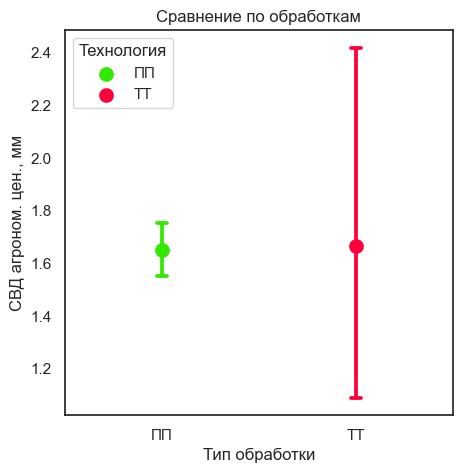

In [59]:
stats, aov, fig = agrofiz_plot(archan, 'СВД агроном. цен., мм')
print(aov)
stats

### Эрозионно опасные (<1 мм), %

F_onewayResult(statistic=7.7748737849871645, pvalue=0.023618485021372076)


Эрозионно опасные (<1 мм), %                     
                                       sem       mean       std
Тип обработки                                                  
ПП                                0.577741   7.042103  1.291868
ТТ                                4.002385  18.317806  8.949604

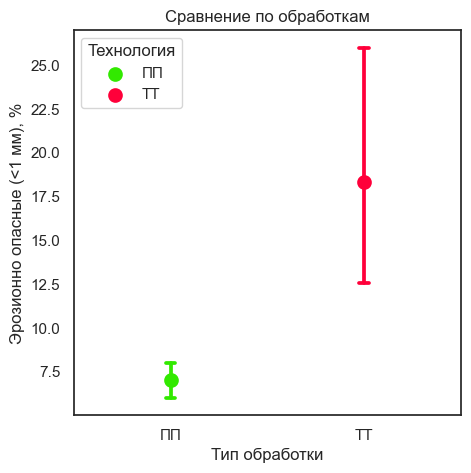

In [60]:
stats, aov, fig = agrofiz_plot(archan, 'Эрозионно опасные (<1 мм), %')
print(aov)
stats

### СВД водопрочных агрегатов

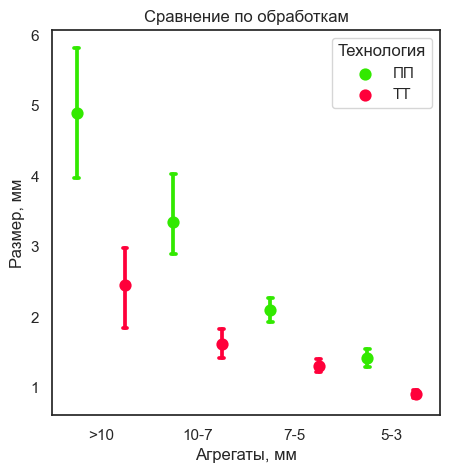

                      агрегаты     P-val
0   СВД водоустойчивые >10, мм  0.004986
1  СВД водоустойчивые 10-7, мм  0.001288
2   СВД водоустойчивые 7-5, мм  0.000103
3   СВД водоустойчивые 5-3, мм  0.000196


СВД водоустойчивые >10, мм                      \
                                     sem      mean       std   
Тип обработки                                                  
ПП                              0.547200  4.905300  1.223576   
ТТ                              0.326838  2.461237  0.730831   

              СВД водоустойчивые 10-7, мм                      \
                                      sem      mean       std   
Тип обработки                                                   
ПП                               0.337521  3.352375  0.754719   
ТТ                               0.116345  1.624337  0.260155   

              СВД водоустойчивые 7-5, мм                      \
                                     sem      mean       std   
Тип обработки                                                  
ПП                              0.099636  2.103825  0.222794   
ТТ                              0.050796  1.311188  0.113582   

              СВД водоустойчивые 5-3, мм                      
                                     sem      mean       std  
Тип обработки                                                 
ПП                              0.074782  1.423237  0.167218  
ТТ                              0.028542  0.906025  0.063823

In [61]:
stats, aov, fig = SVD_vis(archan)
print(aov)
stats

### Содержание эрозионно опасных агрегатов (<1 мм)

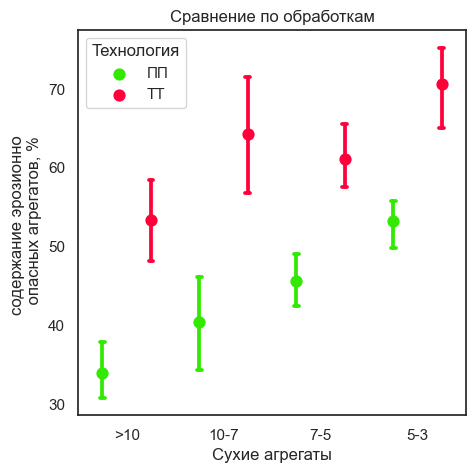

                            агрегаты     P-val
0   Эрозионно опасные >10 (<1 мм), %  0.000536
1  Эрозионно опасные 10-7 (<1 мм), %  0.003153
2   Эрозионно опасные 7-5 (<1 мм), %  0.000910
3   Эрозионно опасные 5-3 (<1 мм), %  0.000706


Эрозионно опасные >10 (<1 мм), %                   \
                                           sem   mean       std   
Тип обработки                                                     
ПП                                    1.980303  33.96  4.428092   
ТТ                                    2.871977  53.35  6.421935   

              Эрозионно опасные 10-7 (<1 мм), %                   \
                                            sem   mean       std   
Тип обработки                                                      
ПП                                     3.641312  40.38  8.142220   
ТТ                                     4.435724  64.27  9.918581   

              Эрозионно опасные 7-5 (<1 мм), %                   \
                                           sem   mean       std   
Тип обработки                                                     
ПП                                    1.902984  45.66  4.255203   
ТТ                                    2.333806  61.07  5.218549   

              Эрозионно опасные 5-3 (<1 мм), %                   
                                           sem   mean       std  
Тип обработки                                                    
ПП                                     1.82424  53.31  4.079124  
ТТ                                     2.68056  70.58  5.993914

In [63]:
stats, aov, fig = eroz_vis(archan)
print(aov)
stats